In [54]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
def loadData():
    with h5py.File('data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY 


In [56]:
def baseline(class_label, trainX, trainY, valX, valY):
    """C1==>P1==>FC=>SoftMax    """
    
    model = tf.keras.models.Sequential()
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = trainX.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [57]:
def architect_1(class_label,trainX, trainY, valX, valY):
    """ CNN1=>P1=>CNN2=>P2=>FC=>Softmax  """
    
    model = tf.keras.models.Sequential()
    # Layer 1 
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = trainX.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Layer 2
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
              
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(class_label, activation = "softmax"))
    return model


In [58]:
def architect_2(class_label,trainX, trainY, valX, valY):
    """ CNNmodel CNN1=>P1=>CNN2=>P2=>CNN3=>P3=>FC=>Softmax  """
    
    model = tf.keras.models.Sequential()
    # Layer 1 
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = trainX.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Layer 2
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # layer 3
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Fully Connected LAyer
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [59]:
def architect_3(class_label,trainX, trainY, valX, valY):
    """ CNNmodel CNN1=>P1=>CNN2=>P2=>CNN3=>P3=>CNN4=>P4=>FC=>Softmax  """
    
    model = tf.keras.models.Sequential()
    # Layer 1 
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = trainX.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Layer 2
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # layer 3
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # layer 4
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Fully Connected LAyer
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [60]:
def architect_4(class_label,trainX, trainY, valX, valY):
    """ CNNmodel CNN1=>P1=>CNN2=>P2=>CNN3=>CNN4=>P3=>CNN5=>P4=>FC=>Softmax  """
    
    model = tf.keras.models.Sequential()
    # Layer 1 
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = trainX.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Layer 2
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # layer 3
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # layer 4
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Fully Connected LAyer
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [61]:
def plot_data(history,arc,details,aug):

    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['loss'], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_loss'], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['acc'], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_acc'], label="val_acc")
    plt.title(arc+aug+"\n"+details)
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.savefig(arc+aug+".png")

## Check the number of labels in the dataset

In [62]:


def run(model_number=0, class_label = 17,NUM_EPOCHS = 50, BATCH_SIZE=64, data_augmentation = False, config = 1):
    start_time =  time.time()
    trainX, trainY, valX, valY = loadData()

    if model_number == 0:
        model=baseline(class_label,   trainX, trainY, valX, valY)
    
    elif model_number == 1:
        model=architect_1(class_label, trainX, trainY, valX, valY)
        
    elif model_number == 2:
        model=architect_2(class_label, trainX, trainY, valX, valY)
    
    elif model_number == 3:
        model=architect_3(class_label,trainX, trainY, valX, valY)
    
    elif model_number == 4:
        model=architect_4(class_label, trainX, trainY, valX, valY)
        
    print(model.summary())
    model.compile(optimizer=SGD(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    if not data_augmentation:

        history = model.fit(x=trainX, y=trainY, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(valX, valY))

    else:

        if   config == 1:
            train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                                    height_shift_range=0.1, shear_range=0,
                                    zoom_range=0,horizontal_flip=False, vertical_flip = False, fill_mode="nearest")
        elif config == 2:
            train_datagen = ImageDataGenerator(rotation_range=45, width_shift_range=0.33,
                                    height_shift_range=0.33, shear_range=0.33,
                                    zoom_range=0.33,horizontal_flip=True,vertical_flip = False,
                                    fill_mode="nearest")
        elif config == 3:

            train_datagen = ImageDataGenerator(rotation_range=90, width_shift_range=0.5,
                                    height_shift_range=0.5, shear_range=0.5,
                                    zoom_range=1,horizontal_flip=True, vertical_flip = True, fill_mode="nearest")
        else:

            train_datagen = ImageDataGenerator(rotation_range=45, width_shift_range=[0.1,0.5],
                                    height_shift_range=[0.1,0.5], shear_range=0.2,
                                    zoom_range=[0.1,1],horizontal_flip=True, fill_mode="nearest")

        train_datagen.fit(trainX)

        history = model.fit_generator(
                          train_datagen.flow(trainX, trainY,batch_size=BATCH_SIZE),
                          steps_per_epoch=  1020 // BATCH_SIZE ,
                          epochs=NUM_EPOCHS,
                          validation_data=(valX,valY))


    end_time =  time.time()



    print("Total Time Elapsed", (end_time-start_time)/60, " mins")

    return history


In [63]:
NUM_EPOCHS = 100
history = run(model_number = 3, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = False, config = 1 )

arc = "Architecture 3"
details="C1>P1>C2>P2>C3>P3>C4>P4>FC>Stmx"
aug = " without DA LR 5 percent"
plot_data(history,arc,details,aug)

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 96)        55392     
_________________________________________________________________

Epoch 45/100
1020/1020 [==============================] - 12s 12ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 4.7829 - val_acc: 0.5059
Epoch 46/100
1020/1020 [==============================] - 12s 12ms/sample - loss: 9.7369e-04 - acc: 1.0000 - val_loss: 4.8364 - val_acc: 0.5000
Epoch 47/100
1020/1020 [==============================] - 12s 12ms/sample - loss: 8.7240e-04 - acc: 1.0000 - val_loss: 4.8781 - val_acc: 0.5059
Epoch 48/100
1020/1020 [==============================] - 12s 12ms/sample - loss: 7.8434e-04 - acc: 1.0000 - val_loss: 4.9188 - val_acc: 0.5059
Epoch 49/100
1020/1020 [==============================] - 12s 12ms/sample - loss: 7.2795e-04 - acc: 1.0000 - val_loss: 4.9536 - val_acc: 0.5059
Epoch 50/100
1020/1020 [==============================] - 12s 12ms/sample - loss: 6.7185e-04 - acc: 1.0000 - val_loss: 4.9951 - val_acc: 0.5029
Epoch 51/100
1020/1020 [==============================] - 12s 12ms/sample - loss: 6.2520e-04 - acc: 1.0000 - val_loss: 5.0245 - val_acc: 0.5

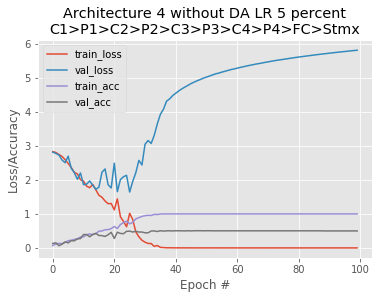

In [53]:
NUM_EPOCHS = 100
history = run(model_number = 4, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = False, config = 1 )

arc = "Architecture 4"
details="C1>P1>C2>P2>C3>P3>C4>P4>FC>Stmx"
aug = " without DA LR 5 percent"
plot_data(history,arc,details,aug)

In [40]:
NUM_EPOCHS = 100
history = run(model_number = 3, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = True, config = 1 )

arc = "Architecture 3"
details="C1>P1>C2>P2>C3>P3>C4>P4>FC>Stmx"
aug = " with DA Config 1"
plot_data(history,arc,details,aug)

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 128, 128, 16)      1216      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________


KeyboardInterrupt: 

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 16)      1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________


Epoch 48/100
15/15 [==============================] - 11s 728ms/step - loss: 2.1665 - acc: 0.2364 - val_loss: 1.9819 - val_acc: 0.3118
Epoch 49/100
15/15 [==============================] - 11s 728ms/step - loss: 2.1508 - acc: 0.2584 - val_loss: 2.0432 - val_acc: 0.3147
Epoch 50/100
15/15 [==============================] - 13s 862ms/step - loss: 2.1762 - acc: 0.2563 - val_loss: 2.0184 - val_acc: 0.3176
Epoch 51/100
15/15 [==============================] - 13s 887ms/step - loss: 2.1371 - acc: 0.2688 - val_loss: 1.8956 - val_acc: 0.3353
Epoch 52/100
15/15 [==============================] - 12s 779ms/step - loss: 2.1100 - acc: 0.2677 - val_loss: 1.9830 - val_acc: 0.2941
Epoch 53/100
15/15 [==============================] - 12s 772ms/step - loss: 2.1544 - acc: 0.2595 - val_loss: 1.8867 - val_acc: 0.3529
Epoch 54/100
15/15 [==============================] - 11s 752ms/step - loss: 2.1069 - acc: 0.2552 - val_loss: 1.9300 - val_acc: 0.3118
Epoch 55/100
15/15 [==============================] - 1

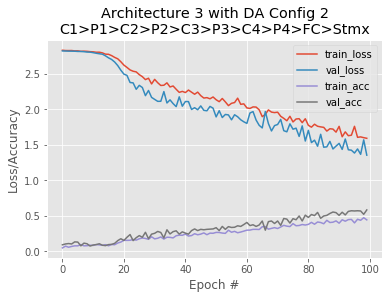

In [11]:
NUM_EPOCHS = 100
history = run(model_number = 3, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = True, config = 2 )

arc = "Architecture 3"
details="C1>P1>C2>P2>C3>P3>C4>P4>FC>Stmx"
aug = " with DA Config 2"
plot_data(history,arc,details,aug)


(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 16)      1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________


Epoch 48/100
15/15 [==============================] - 11s 713ms/step - loss: 2.4463 - acc: 0.1799 - val_loss: 2.2580 - val_acc: 0.2176
Epoch 49/100
15/15 [==============================] - 11s 701ms/step - loss: 2.3832 - acc: 0.1958 - val_loss: 2.2279 - val_acc: 0.2529
Epoch 50/100
15/15 [==============================] - 11s 700ms/step - loss: 2.4002 - acc: 0.1954 - val_loss: 2.1876 - val_acc: 0.2529
Epoch 51/100
15/15 [==============================] - 11s 702ms/step - loss: 2.4041 - acc: 0.1967 - val_loss: 2.1833 - val_acc: 0.2206
Epoch 52/100
15/15 [==============================] - 12s 771ms/step - loss: 2.4176 - acc: 0.1872 - val_loss: 2.1757 - val_acc: 0.2765
Epoch 53/100
15/15 [==============================] - 12s 813ms/step - loss: 2.3845 - acc: 0.2042 - val_loss: 2.2165 - val_acc: 0.2882
Epoch 54/100
15/15 [==============================] - 11s 727ms/step - loss: 2.3693 - acc: 0.2038 - val_loss: 2.2141 - val_acc: 0.2735
Epoch 55/100
15/15 [==============================] - 1

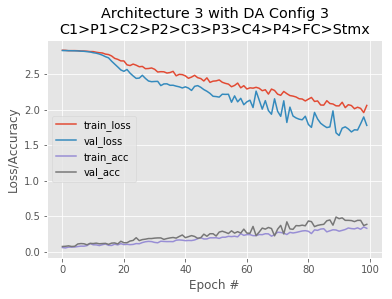

In [12]:
NUM_EPOCHS = 100
history = run(model_number = 3, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = True, config = 3 )

arc = "Architecture 3"
details="C1>P1>C2>P2>C3>P3>C4>P4>FC>Stmx"
aug = " with DA Config 3"
plot_data(history,arc,details,aug)


(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 96)        55392     
_________________________________________________________________


15/15 [==============================] - 12s 811ms/step - loss: 1.5720 - acc: 0.4740 - val_loss: 1.6317 - val_acc: 0.4206
Epoch 48/100
15/15 [==============================] - 13s 861ms/step - loss: 1.6302 - acc: 0.4603 - val_loss: 1.6365 - val_acc: 0.4235
Epoch 49/100
15/15 [==============================] - 13s 839ms/step - loss: 1.5437 - acc: 0.4697 - val_loss: 1.6331 - val_acc: 0.4265
Epoch 50/100
15/15 [==============================] - 13s 844ms/step - loss: 1.5176 - acc: 0.4644 - val_loss: 1.5620 - val_acc: 0.4412
Epoch 51/100
15/15 [==============================] - 13s 851ms/step - loss: 1.5136 - acc: 0.4718 - val_loss: 1.6263 - val_acc: 0.4118
Epoch 52/100
15/15 [==============================] - 13s 865ms/step - loss: 1.5358 - acc: 0.4740 - val_loss: 1.5818 - val_acc: 0.4529
Epoch 53/100
15/15 [==============================] - 13s 866ms/step - loss: 1.4759 - acc: 0.4758 - val_loss: 1.5479 - val_acc: 0.4941
Epoch 54/100
15/15 [==============================] - 13s 838ms/step

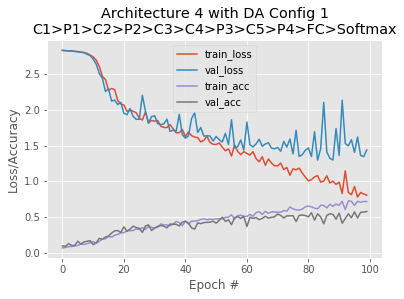

In [13]:
NUM_EPOCHS = 100
history = run(model_number = 4, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = True, config = 1 )

arc = "Architecture 4"
details="C1>P1>C2>P2>C3>C4>P3>C5>P4>FC>Softmax"
aug = " with DA Config 1"
plot_data(history,arc,details,aug)


(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 96)        55392     
_________________________________________________________________

15/15 [==============================] - 13s 879ms/step - loss: 1.7718 - acc: 0.3797 - val_loss: 1.8688 - val_acc: 0.3265
Epoch 48/200
15/15 [==============================] - 14s 942ms/step - loss: 1.9553 - acc: 0.3368 - val_loss: 1.7661 - val_acc: 0.4412
Epoch 49/200
15/15 [==============================] - 14s 965ms/step - loss: 1.7457 - acc: 0.4038 - val_loss: 1.7982 - val_acc: 0.3824
Epoch 50/200
15/15 [==============================] - 14s 957ms/step - loss: 1.6888 - acc: 0.4048 - val_loss: 1.5849 - val_acc: 0.4706
Epoch 51/200
15/15 [==============================] - 13s 886ms/step - loss: 1.7091 - acc: 0.3677 - val_loss: 1.4950 - val_acc: 0.5118
Epoch 52/200
15/15 [==============================] - 13s 900ms/step - loss: 1.7544 - acc: 0.4002 - val_loss: 1.5660 - val_acc: 0.4676
Epoch 53/200
15/15 [==============================] - 13s 876ms/step - loss: 1.6574 - acc: 0.4427 - val_loss: 1.5591 - val_acc: 0.4794
Epoch 54/200
15/15 [==============================] - 15s 1s/step - 

Epoch 108/200
15/15 [==============================] - 13s 851ms/step - loss: 1.2159 - acc: 0.5914 - val_loss: 1.0449 - val_acc: 0.7029
Epoch 109/200
15/15 [==============================] - 13s 863ms/step - loss: 1.1130 - acc: 0.6119 - val_loss: 0.9633 - val_acc: 0.6912
Epoch 110/200
15/15 [==============================] - 13s 892ms/step - loss: 1.0602 - acc: 0.6229 - val_loss: 1.1451 - val_acc: 0.6735
Epoch 111/200
15/15 [==============================] - 13s 874ms/step - loss: 1.1552 - acc: 0.6203 - val_loss: 0.9716 - val_acc: 0.7176
Epoch 112/200
15/15 [==============================] - 13s 882ms/step - loss: 1.0512 - acc: 0.6412 - val_loss: 1.1137 - val_acc: 0.6294
Epoch 113/200
15/15 [==============================] - 13s 878ms/step - loss: 1.0092 - acc: 0.6527 - val_loss: 1.1571 - val_acc: 0.6588
Epoch 114/200
15/15 [==============================] - 13s 883ms/step - loss: 1.2089 - acc: 0.5826 - val_loss: 1.0009 - val_acc: 0.6941
Epoch 115/200
15/15 [===========================

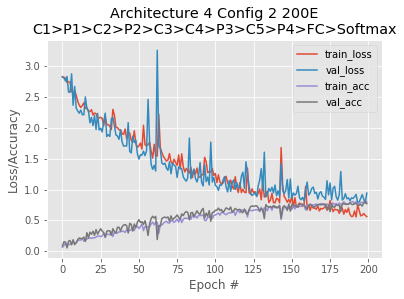

In [64]:
NUM_EPOCHS = 200
history = run(model_number = 4, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = True, config = 2 )

arc = "Architecture 4"
details="C1>P1>C2>P2>C3>C4>P3>C5>P4>FC>Softmax"
aug = " Config 2 200E"
plot_data(history,arc,details,aug)


(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 96)        55392     
_________________________________________________________________


Epoch 47/100
15/15 [==============================] - 13s 834ms/step - loss: 2.4635 - acc: 0.1496 - val_loss: 2.3530 - val_acc: 0.1971
Epoch 48/100
15/15 [==============================] - 13s 889ms/step - loss: 2.4657 - acc: 0.1569 - val_loss: 2.3389 - val_acc: 0.1941
Epoch 49/100
15/15 [==============================] - 13s 859ms/step - loss: 2.4450 - acc: 0.1726 - val_loss: 2.2877 - val_acc: 0.2000
Epoch 50/100
15/15 [==============================] - 13s 853ms/step - loss: 2.4584 - acc: 0.1517 - val_loss: 2.3249 - val_acc: 0.2088
Epoch 51/100
15/15 [==============================] - 13s 877ms/step - loss: 2.4604 - acc: 0.1569 - val_loss: 2.3468 - val_acc: 0.2059
Epoch 52/100
15/15 [==============================] - 13s 874ms/step - loss: 2.4752 - acc: 0.1517 - val_loss: 2.3249 - val_acc: 0.2176
Epoch 53/100
15/15 [==============================] - 13s 882ms/step - loss: 2.4497 - acc: 0.1548 - val_loss: 2.3172 - val_acc: 0.2147
Epoch 54/100
15/15 [==============================] - 1

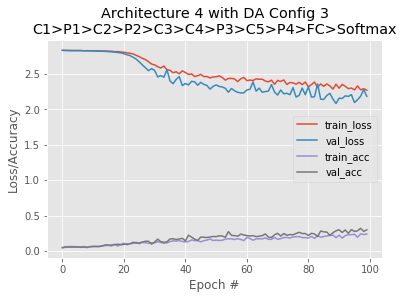

In [15]:
NUM_EPOCHS = 100
history = run(model_number = 4, class_label = 17,NUM_EPOCHS = NUM_EPOCHS, BATCH_SIZE=64, data_augmentation = True, config = 3 )
arc = "Architecture 4"
details="C1>P1>C2>P2>C3>C4>P3>C5>P4>FC>Softmax"
aug = " with DA Config 3"
plot_data(history,arc,details,aug)
